In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Komal/Desktop/data analyst/Indian_Kids_Screen_Time.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [4]:
df.shape

(9712, 8)

In [13]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [14]:
import missingno as msno
from warnings import filterwarnings

filterwarnings(action='ignore')

<Axes: >

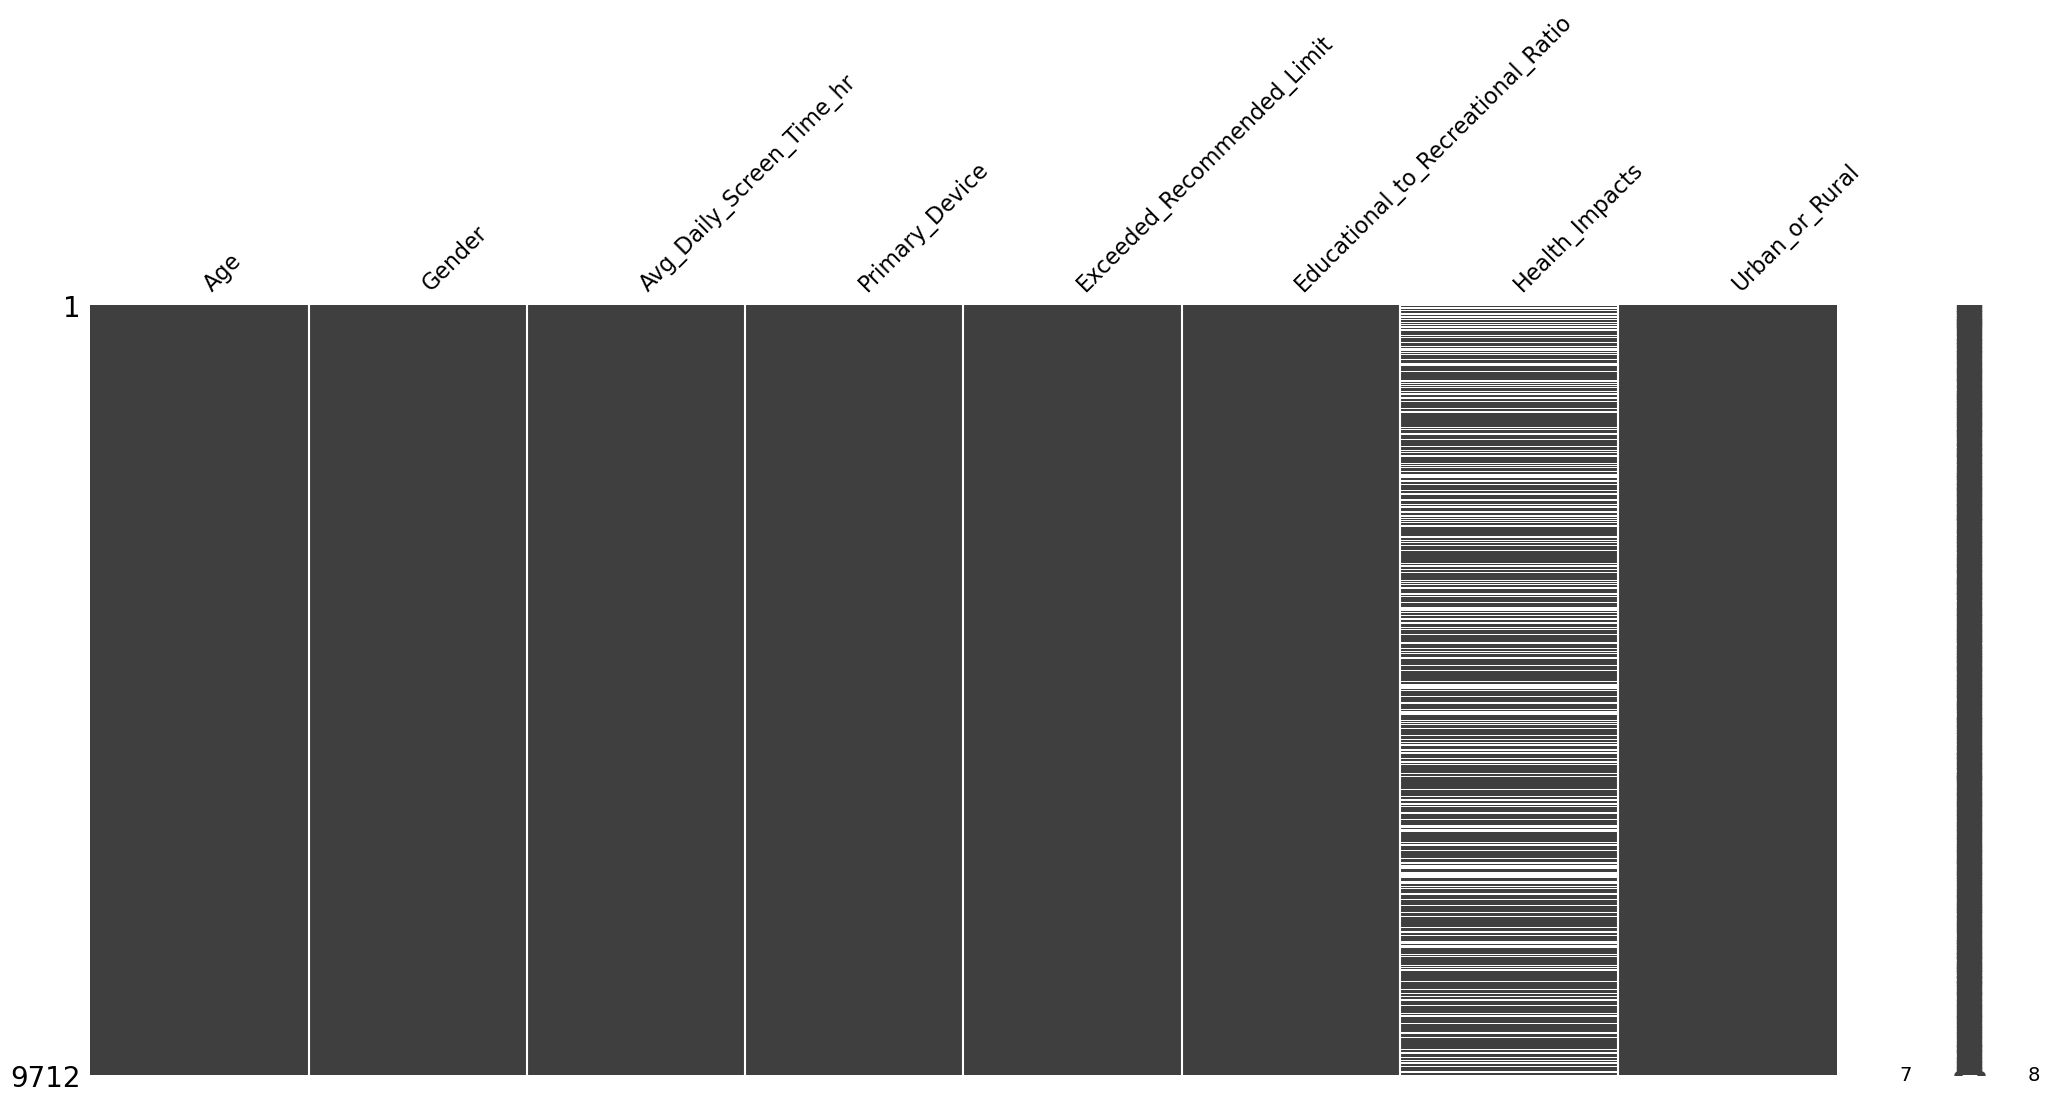

In [15]:
msno.matrix(df)

<Axes: >

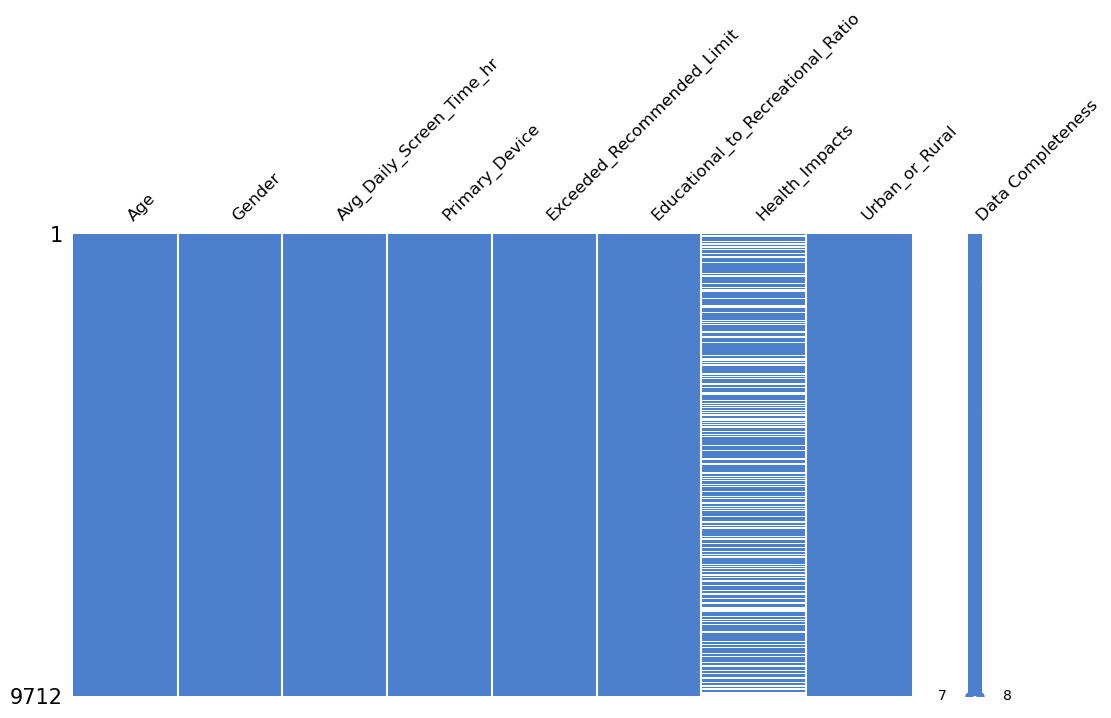

In [16]:
msno.matrix(
    df,
    figsize=(12, 6),        # Change figure size
    color=(0.3, 0.5, 0.8),  # Set a custom color (R, G, B)
    fontsize=12,            # Adjust font size of labels
    sparkline=True,         # Show the sparkline at the right
    labels=True             # Show column labels
)

In [17]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [18]:
df.isnull().any()

Age                                  False
Gender                               False
Avg_Daily_Screen_Time_hr             False
Primary_Device                       False
Exceeded_Recommended_Limit           False
Educational_to_Recreational_Ratio    False
Health_Impacts                        True
Urban_or_Rural                       False
dtype: bool

<Axes: >

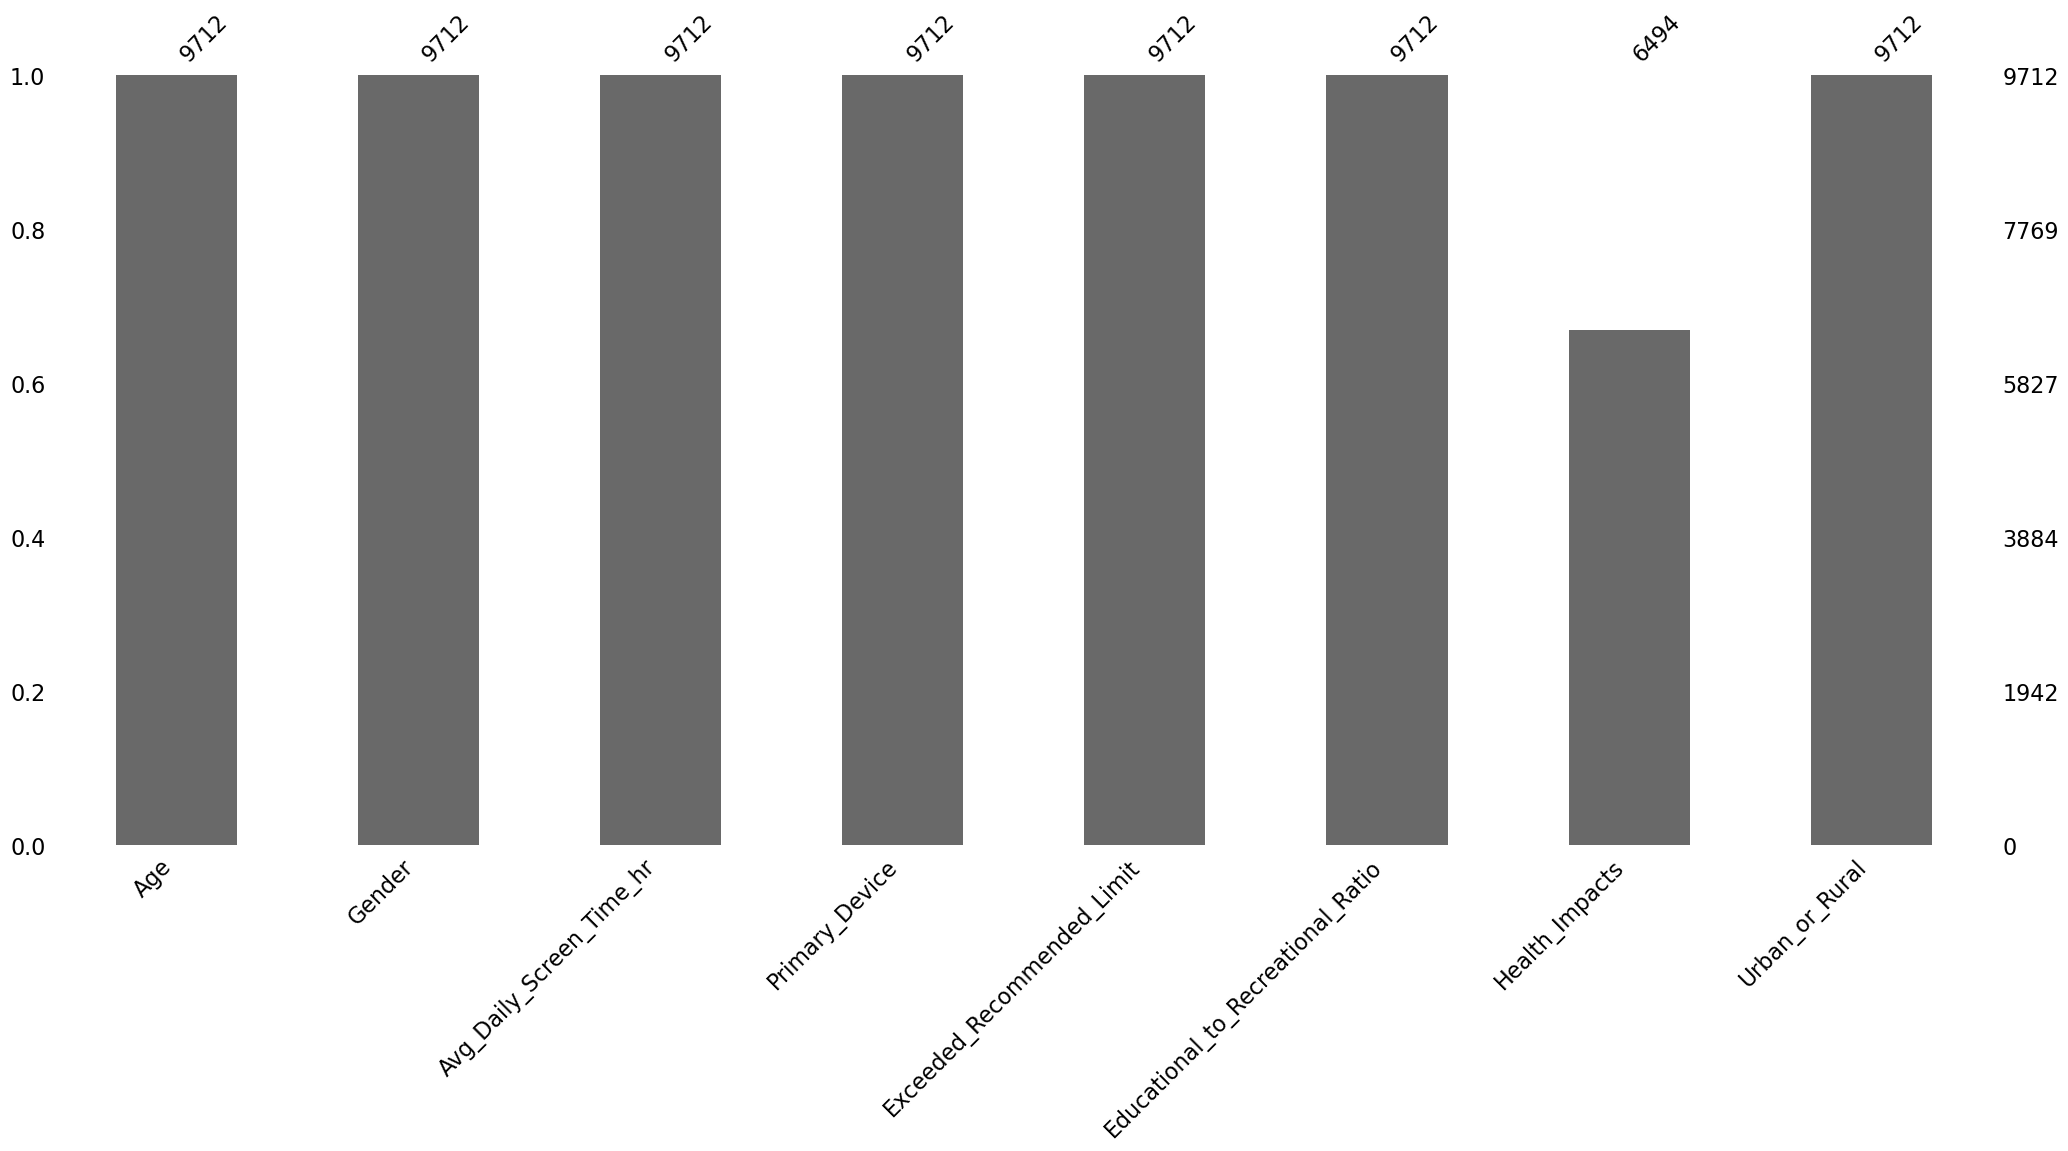

In [19]:
msno.bar(df)

In [22]:
df['Health_Impacts'].value_counts()

Health_Impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

In [26]:
df['Health_Impacts'].fillna('Missing',inplace=True)

<Axes: xlabel='Health_Impacts'>

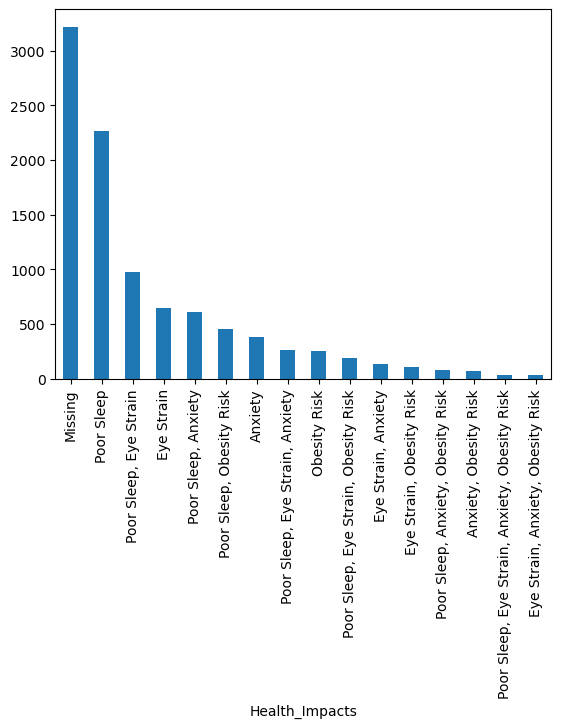

In [33]:
df['Health_Impacts'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

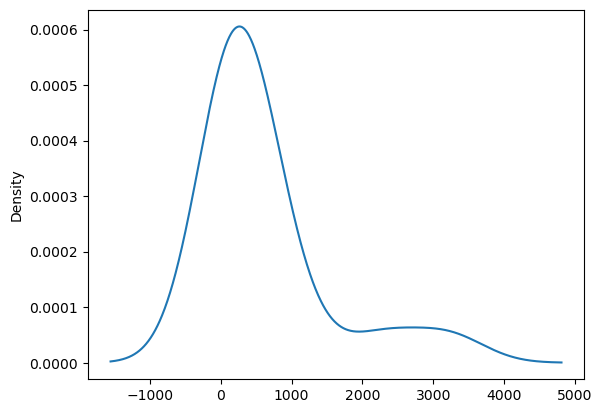

In [34]:
df['Health_Impacts'].value_counts().plot(kind='kde')

<Axes: ylabel='count'>

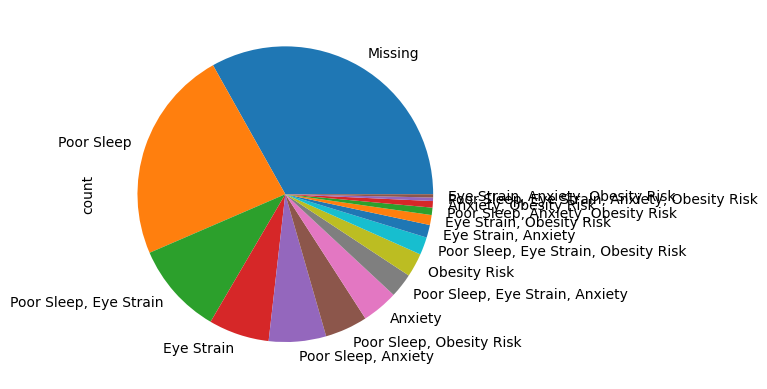

In [36]:
df['Health_Impacts'].value_counts().plot(kind='pie')

In [38]:
df['Age'].value_counts()

Age
17    919
8     912
13    910
14    896
9     885
10    877
16    876
12    867
11    866
15    864
18    840
Name: count, dtype: int64

In [40]:
df['Age'].isnull().sum()

0

<Axes: ylabel='count'>

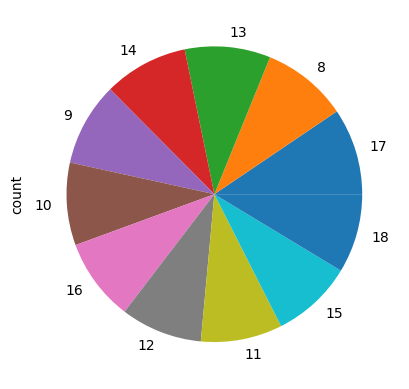

In [41]:
df['Age'].value_counts().plot(kind='pie')

<Axes: ylabel='Age'>

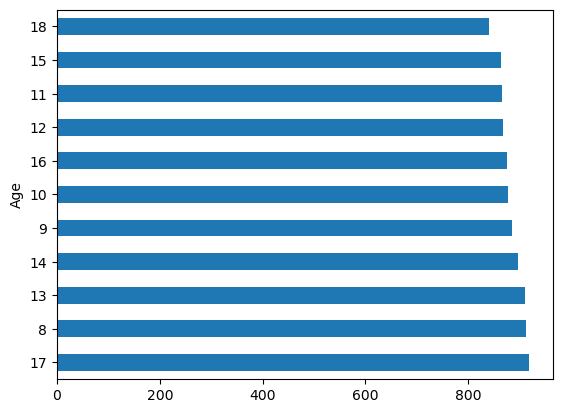

In [42]:
df['Age'].value_counts().plot(kind='barh')

In [43]:
goupby=df.groupby(['Age','Health_Impacts']).size().reset_index(name='counts')

In [44]:
print(goupby.head())

   Age            Health_Impacts  counts
0    8                   Anxiety      26
1    8     Anxiety, Obesity Risk       3
2    8                Eye Strain      42
3    8       Eye Strain, Anxiety       7
4    8  Eye Strain, Obesity Risk       8


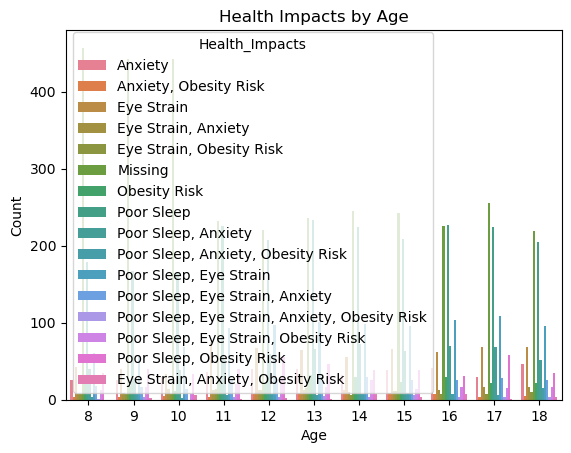

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, check if there's a typo in the variable name
# It should be 'groupby' instead of 'goupby'

# Option 1: If you need to create a count column first
# Assuming you want to count occurrences by Age and Health_Impacts
groupby = df.groupby(['Age', 'Health_Impacts']).size().reset_index(name='Count')

# Option 2: If you want to use an existing column instead of 'Count'
# Replace 'YourExistingColumn' with the actual column name in your dataframe
# sns.barplot(x='Age', y='YourExistingColumn', hue='Health_Impacts', data=groupby)

sns.barplot(x='Age', y='Count', hue='Health_Impacts', data=groupby)
plt.title('Health Impacts by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

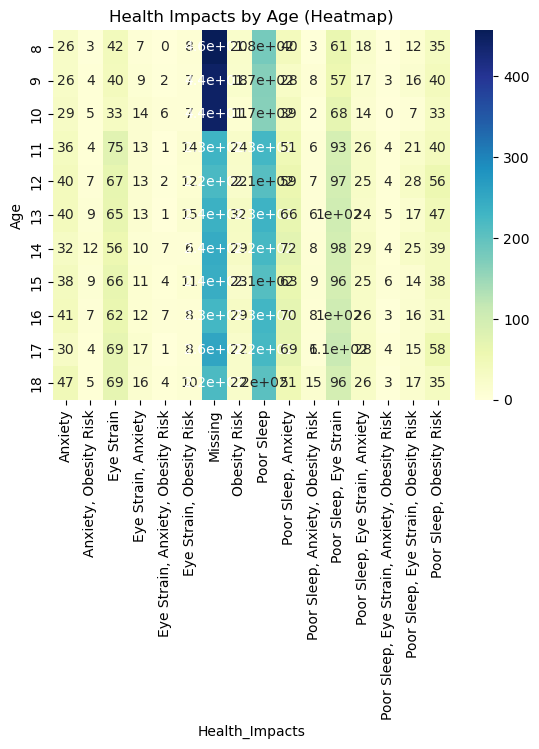

In [49]:
pivot = df.pivot_table(index='Age', columns='Health_Impacts', aggfunc='size', fill_value=0)
sns.heatmap(pivot, cmap='YlGnBu', annot=True)
plt.title('Health Impacts by Age (Heatmap)')
plt.show()

In [50]:
df['Avg_Daily_Screen_Time_hr'].describe()

count    9712.000000
mean        4.352837
std         1.718232
min         0.000000
25%         3.410000
50%         4.440000
75%         5.380000
max        13.890000
Name: Avg_Daily_Screen_Time_hr, dtype: float64

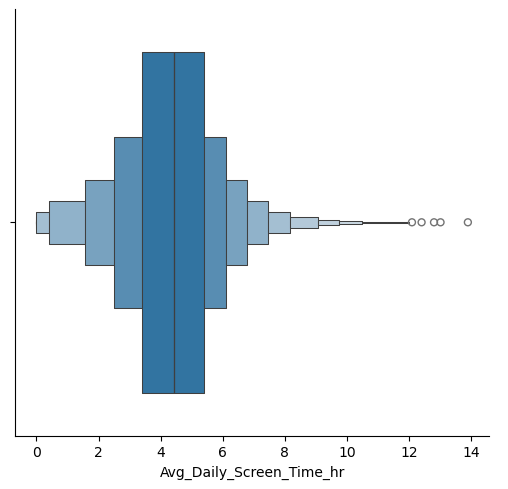

In [5]:
sns.catplot(
    data=df,
    x='Avg_Daily_Screen_Time_hr',
    kind='boxen',
)

In [51]:
df['Age'].describe()

count    9712.000000
mean       12.979201
std         3.162437
min         8.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        18.000000
Name: Age, dtype: float64

<Axes: xlabel='Avg_Daily_Screen_Time_hr', ylabel='Count'>

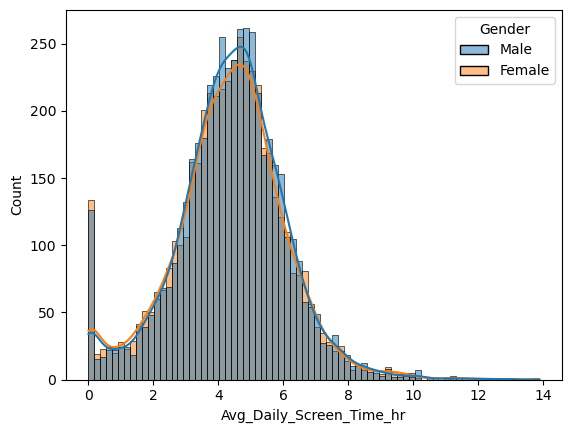

In [6]:
sns.histplot(
    df,
    x=df['Avg_Daily_Screen_Time_hr'],
    hue='Gender',
    kde=True,
    
)

In [11]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

plt.rcParams["figure.figsize"]=(8,5)
plt.rcParams["axes.grid"]=True
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [ ]:
# Here, cat_cols lists all columns that represent categories.
#The loop converts each of these columns into category dtype.
#Why is it necessary?
#Memory Efficiency: Categorical columns take less memory because pandas internally maps repeated strings to numeric codes.
#Faster Computation: Operations like grouping or counting are faster on categorical data.
#Correct Semantics: Declaring a column as categorical tells pandas (and statistical models) that it is a discrete variable, not a continuous one.
#Better Visualizations and Analysis: Some libraries (like seaborn or statsmodels) work better when variables are explicitly categorical, especially for ANOVA or regression with factors.



In [13]:
cat_cols = ["Gender", "Primary_Device", "Exceeded_Recommended_Limit", "Health_Impacts", "Urban_or_Rural"]
for c in cat_cols:
    df[c] = df[c].astype("category")

In [14]:
#Quick Integrity Checks

print("Missing values by column:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values by column:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64
Duplicate rows: 44


In [16]:
# Create Age Bands (Optional, for grouped analysis & ANOVA)

age_bins = [7, 10, 13, 16, 18]  # inclusive edges: (7-10], (10-13], (13-16], (16-18]
age_labels = ["8-10", "11-13", "14-16", "17-18"]
df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=True, include_lowest=True)


In [ ]:
# Explanation:
#age_bins defines the boundaries of each group (e.g., 7–10, 10–13).

#age_labels assigns a human-readable label for each range.

#pd.cut() is used to categorize continuous values (ages) into discrete bins.

#The result is a new column Age_Group that contains labels like "8-10", "11-13", etc.

# Why is it important?
#Simplifies Analysis: Instead of analyzing every single age (8, 9, 10, etc.), grouping makes trends clearer (e.g., "younger vs older teens").
#Needed for ANOVA: Many statistical tests and visualizations compare groups, not individual continuous values.
#Improves Visualization: Bar charts and boxplots are easier to read when age is grouped.
#Real-world Meaning: Age groups (like 8–10 years) often reflect developmental stages relevant to screen time behavior.





In [17]:
#Descriptive Statistics: 

#Numeric Summary
df.describe(include=[np.number]).T



,count,mean,std,min,25%,50%,75%,max
Age,9712.0,12.979201,3.162437,8.0,10.00,13.00,16.00,18.00
Avg_Daily_Screen_Time_hr,9712.0,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Educational_to_Recreational_Ratio,9712.0,0.427226,0.073221,0.3,0.37,0.43,0.48,0.60


In [ ]:
#Explanation:
#df.describe(): Provides summary statistics (mean, min, max, quartiles, etc.) for each column in the DataFrame.
#include=[np.number]: Tells pandas to include only numeric columns (e.g., int, float) in the summary.
#T: Transposes the result so that rows become columns and vice versa — making it easier to read (each numeric variable becomes a row, with columns for mean, std, etc.).



#Why is it important?
#Quick Data Overview: It displays the central tendency (mean), spread (standard deviation), and range (minimum and maximum).
#Spot Outliers or Errors: Large gaps between min/max and quartiles can hint at outliers or incorrect data.
#Guided Analysis: You can identify which numeric features vary significantly or have small values (useful for scaling in models).

In [18]:
for c in ["Gender","Primary_Device","Exceeded_Recommended_Limit","Health_Impacts","Urban_or_Rural","Age_Group"]:
    if c in df.columns:
        display(pd.DataFrame(df[c].value_counts()).rename(columns={c:"counts"}))

,count
Gender,
Male,4942
Female,4770


,count
Primary_Device,
Smartphone,4568
TV,2487
Laptop,1433
Tablet,1224


,count
Exceeded_Recommended_Limit,
True,8301
False,1411


,count
Health_Impacts,
Poor Sleep,2268
"Poor Sleep, Eye Strain",979
Eye Strain,644
"Poor Sleep, Anxiety",608
"Poor Sleep, Obesity Risk",452
Anxiety,385
"Poor Sleep, Eye Strain, Anxiety",258
Obesity Risk,252
"Poor Sleep, Eye Strain, Obesity Risk",188


,count
Urban_or_Rural,
Urban,6851
Rural,2861


,count
Age_Group,
8-10,2674
11-13,2643
14-16,2636
17-18,1759


In [ ]:
#Why is it important?
#Data Distribution: It shows how balanced or imbalanced categories are (e.g., more urban kids than rural).

#Data Cleaning: Helps identify unexpected values (e.g., misspellings like "Femle").

#Visualization & Modeling: Guides that categories might need grouping or balancing for analysis.

In [21]:
#Quick Key Metrics (Save for Report)

n= len(df)
mean_screen= df["Avg_Daily_Screen_Time_hr"].mean()
std_screen= df["Avg_Daily_Screen_Time_hr"].std()
prop_exceed = df["Exceeded_Recommended_Limit"].mean()
print(f"Records:{n:,}")
print(f"mean daily screen time:{mean_screen:.2f} hr(SD={std_screen:.2f})\")
print(f"%Exceeding recommended limit:{prop_exceed*100:.1f}%")

SyntaxError: unterminated f-string literal (detected at line 8) (2707052814.py, line 8)

In [22]:
n= len(df)
mean_screen= df["Avg_Daily_Screen_Time_hr"].mean()
std_screen= df["Avg_Daily_Screen_Time_hr"].std()
prop_exceed = df["Exceeded_Recommended_Limit"].mean()
print(f"Records:{n:,}")  # Removed the backslash before the closing quote
print(f"mean daily screen time:{mean_screen:.2f} hr(SD={std_screen:.2f})")  # Removed the backslash before the closing quote
print(f"%Exceeding recommended limit:{prop_exceed*100:.1f}%")

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [23]:
n = len(df)

# Convert categorical columns to numeric type
df["Avg_Daily_Screen_Time_hr"] = pd.to_numeric(df["Avg_Daily_Screen_Time_hr"], errors='coerce')
# If "Exceeded_Recommended_Limit" is also categorical and contains 0/1 or True/False values
if df["Exceeded_Recommended_Limit"].dtype.name == 'category':
    df["Exceeded_Recommended_Limit"] = pd.to_numeric(df["Exceeded_Recommended_Limit"], errors='coerce')

# Now calculate statistics
mean_screen = df["Avg_Daily_Screen_Time_hr"].mean()
std_screen = df["Avg_Daily_Screen_Time_hr"].std()
prop_exceed = df["Exceeded_Recommended_Limit"].mean()

print(f"Records:{n:,}")
print(f"mean daily screen time:{mean_screen:.2f} hr(SD={std_screen:.2f})")
print(f"%Exceeding recommended limit:{prop_exceed*100:.1f}%")









Records:9,712
mean daily screen time:4.35 hr(SD=1.72)
%Exceeding recommended limit:85.5%


In [ ]:
#The "Quick Key Metrics" section calculates three essential summary statistics for your dataset:

Total Records (n) – n = len(df)
This tells you how many rows (children) are in the dataset. It's important for understanding sample size, which affects the reliability of conclusions.

Mean and Standard Deviation of Screen Time

python
Copy
Edit
mean_screen = df["Avg_Daily_Screen_Time_hr"].mean()
std_screen  = df["Avg_Daily_Screen_Time_hr"].std()
Mean shows the average daily screen time across all kids.

Standard Deviation (SD) tells how much screen time varies among kids.

Proportion Exceeding Recommended Limit

python
Copy
Edit
prop_exceed = df["Exceeded_Recommended_Limit"].mean()
Since True is treated as 1 and False as 0, the mean here gives the percentage of children exceeding the recommended limit.



In [ ]:
#ummarizing Data: These metrics give an immediate snapshot of the dataset's central tendencies and risk factors (like how many kids exceed limits).

For Reporting: They're easy to communicate (e.g., "The average screen time is 4.3 hours, and 85% of kids exceed guidelines").

Baseline Check: Helps verify if data is realistic and aligns with expected patterns.

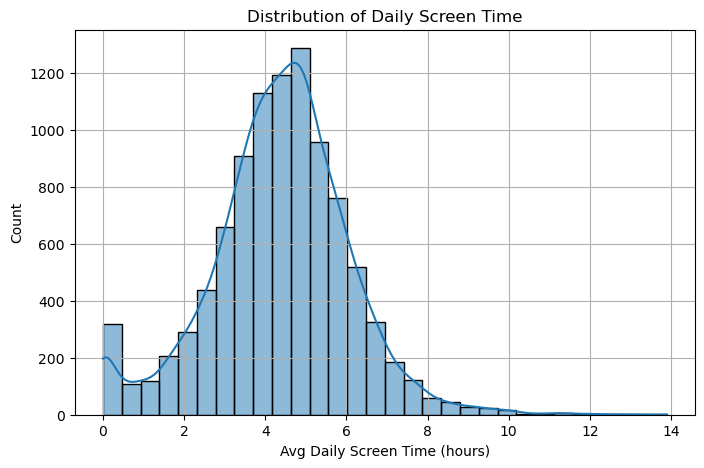

In [24]:
#Visualization: Univariate Distributions

#Screen Time Histogram & KDE

sns.histplot(df["Avg_Daily_Screen_Time_hr"], kde=True, bins=30)
plt.xlabel("Avg Daily Screen Time (hours)")
plt.title("Distribution of Daily Screen Time")
plt.show()





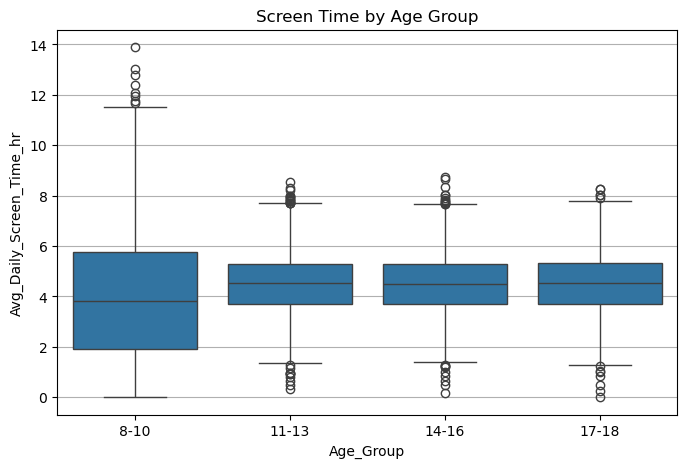

In [25]:
#Boxplot by Age Group

sns.boxplot(x="Age_Group", y="Avg_Daily_Screen_Time_hr", data=df)
plt.title("Screen Time by Age Group")
plt.show()

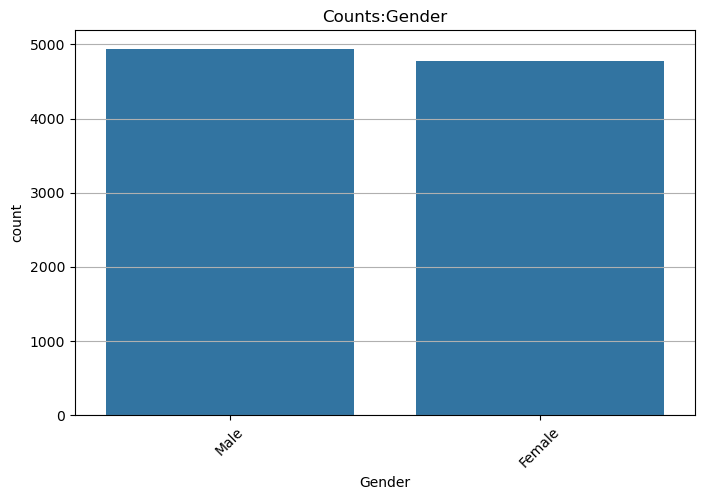

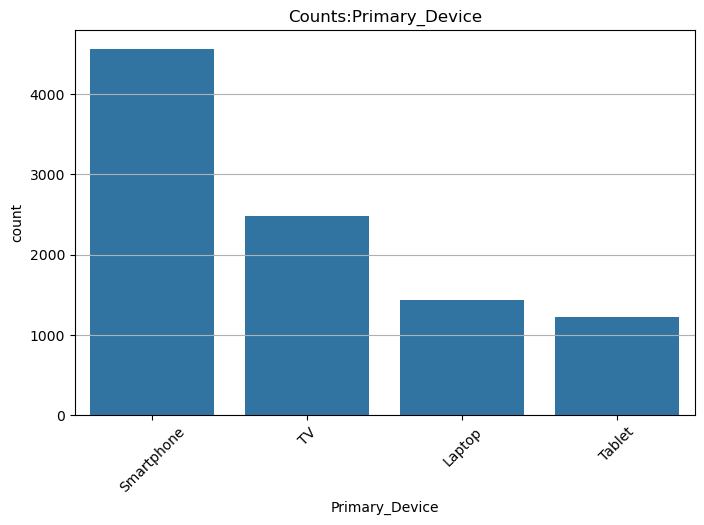

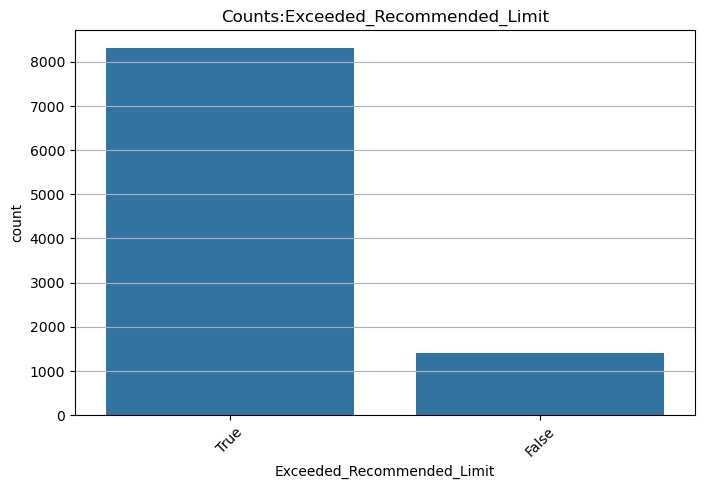

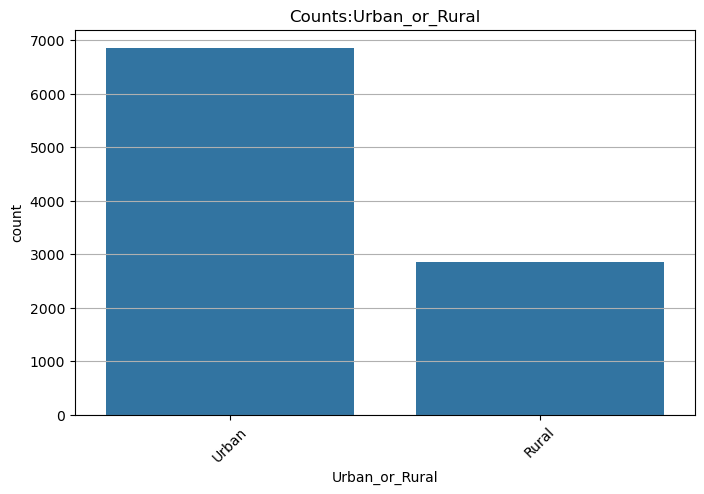

In [29]:
#Count Plots for Categoricals

def plot_count(col):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Counts:{col}")
    plt.xticks(rotation=45)
    plt.show()

for col in ["Gender", "Primary_Device", "Exceeded_Recommended_Limit","Urban_or_Rural"]:
    plot_count(col)

C:\Users\Komal\AppData\Local\Temp\ipykernel_5164\1173888258.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("Age_Group")["Avg_Daily_Screen_Time_hr"].mean()


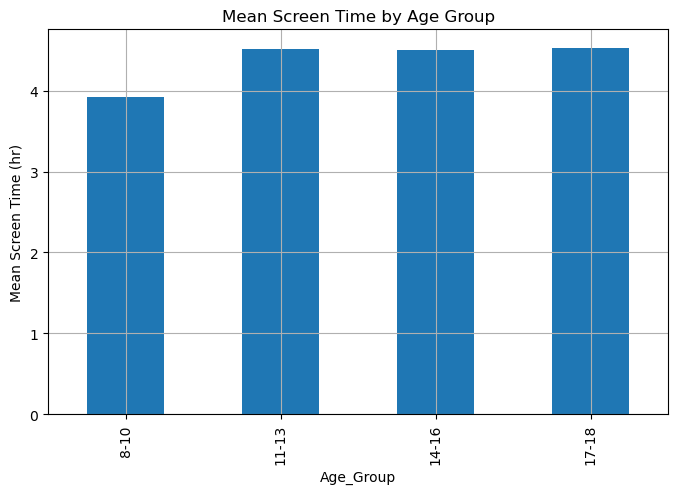

In [30]:
# Bivariate Exploration
# Mean Screen Time by Category
(df.groupby("Age_Group")["Avg_Daily_Screen_Time_hr"].mean()
   .sort_index()
   .plot(kind="bar", ylabel="Mean Screen Time (hr)", title="Mean Screen Time by Age Group"))
plt.show()

C:\Users\Komal\AppData\Local\Temp\ipykernel_5164\3259342596.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(col)["Avg_Daily_Screen_Time_hr"].mean()


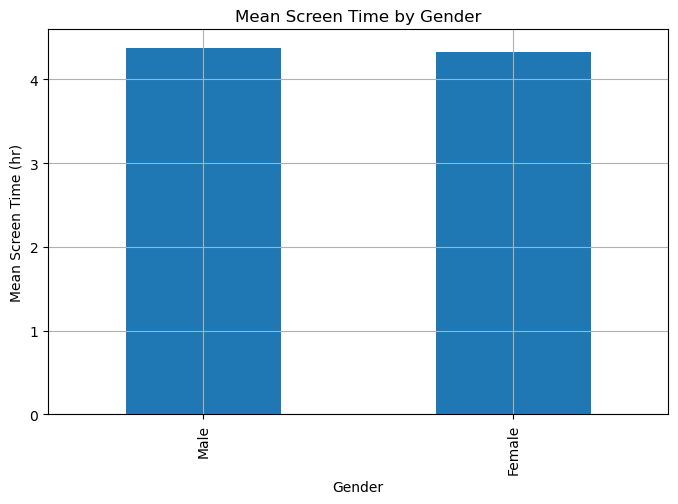

C:\Users\Komal\AppData\Local\Temp\ipykernel_5164\3259342596.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(col)["Avg_Daily_Screen_Time_hr"].mean()


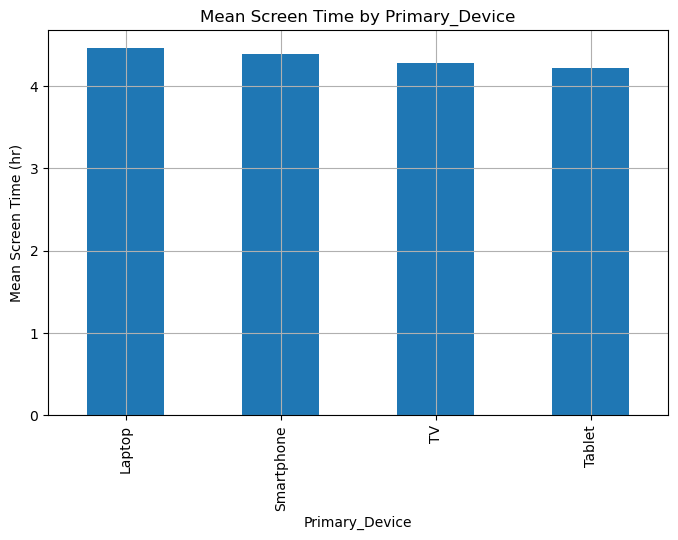

C:\Users\Komal\AppData\Local\Temp\ipykernel_5164\3259342596.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(col)["Avg_Daily_Screen_Time_hr"].mean()


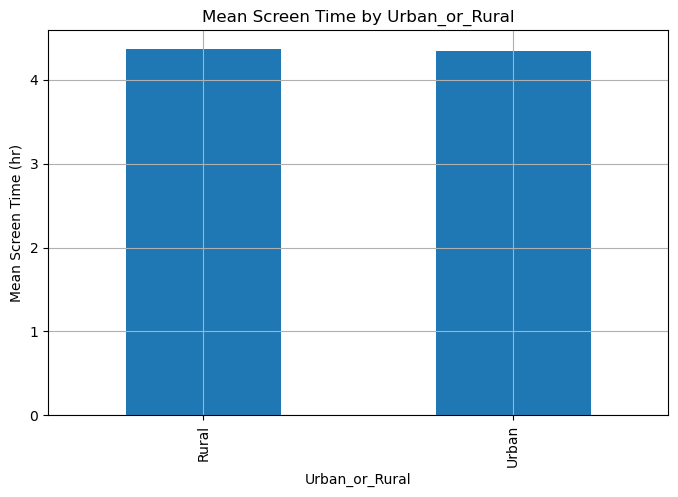

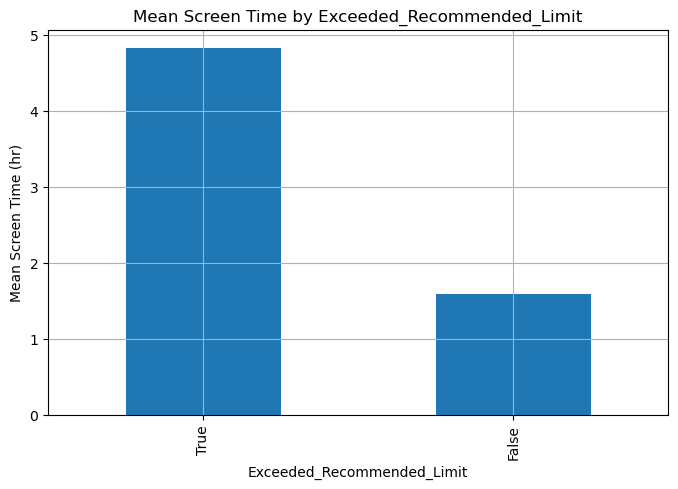

In [31]:
for col in ["Gender","Primary_Device","Urban_or_Rural","Exceeded_Recommended_Limit"]:
    (df.groupby(col)["Avg_Daily_Screen_Time_hr"].mean()
       .sort_values(ascending=False)
       .plot(kind="bar", ylabel="Mean Screen Time (hr)", title=f"Mean Screen Time by {col}"))
    plt.show()

C:\Users\Komal\AppData\Local\Temp\ipykernel_5164\2603688506.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby(col)["Exceeded_Recommended_Limit"].mean().sort_values(ascending=False)


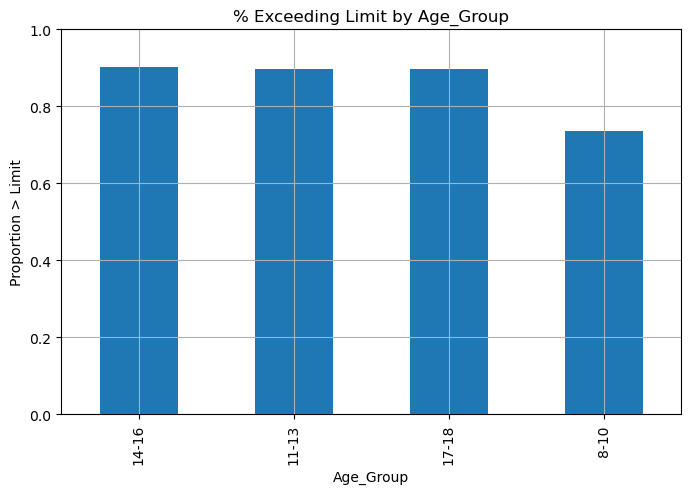

C:\Users\Komal\AppData\Local\Temp\ipykernel_5164\2603688506.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby(col)["Exceeded_Recommended_Limit"].mean().sort_values(ascending=False)


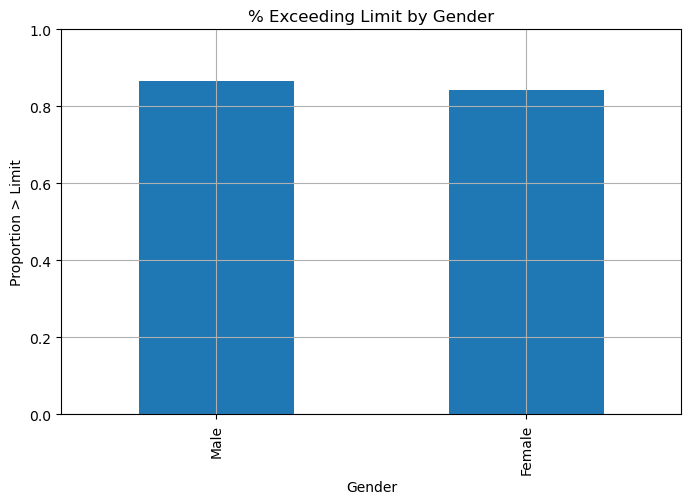

C:\Users\Komal\AppData\Local\Temp\ipykernel_5164\2603688506.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby(col)["Exceeded_Recommended_Limit"].mean().sort_values(ascending=False)


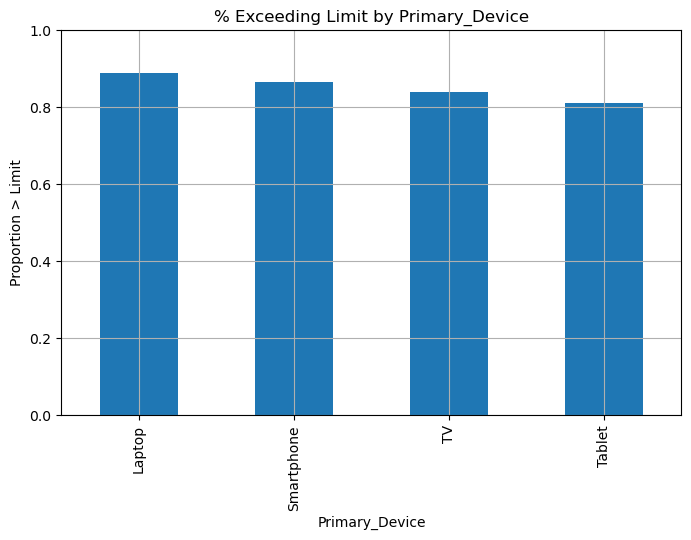

C:\Users\Komal\AppData\Local\Temp\ipykernel_5164\2603688506.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby(col)["Exceeded_Recommended_Limit"].mean().sort_values(ascending=False)


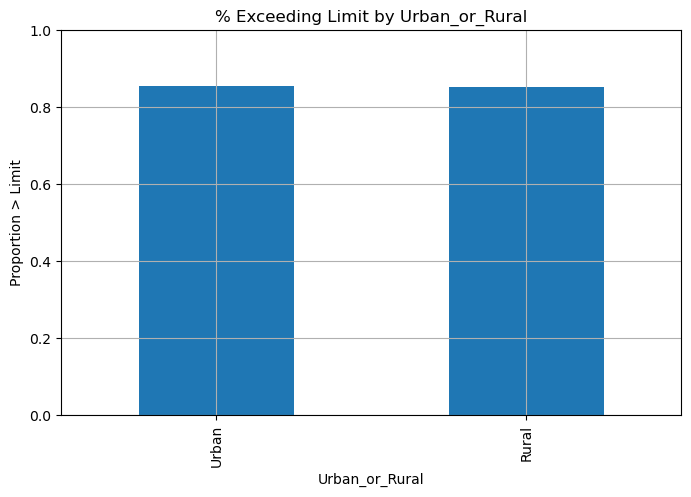

In [32]:
#Proportion Exceeding Limit by Group
def prop_exceed_by(col):
    tmp = df.groupby(col)["Exceeded_Recommended_Limit"].mean().sort_values(ascending=False)
    tmp.plot(kind="bar", ylabel="Proportion > Limit", ylim=(0,1), title=f"% Exceeding Limit by {col}")
    plt.show()

for col in ["Age_Group","Gender","Primary_Device","Urban_or_Rural"]:
    prop_exceed_by(col)


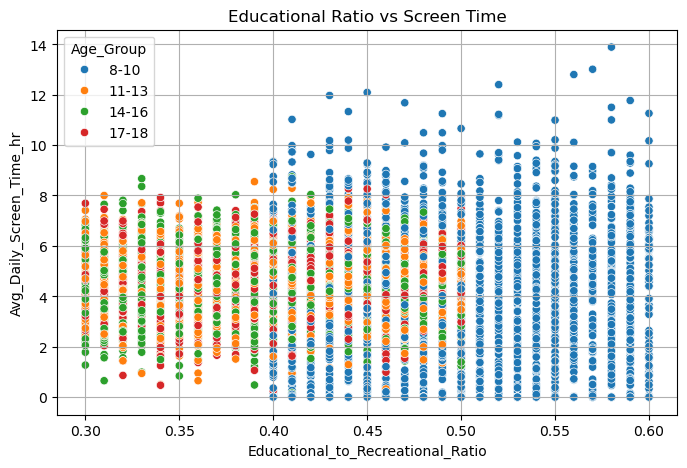

Correlation (Pearson r): -0.088


In [33]:
# Relationship: Educational Ratio vs Screen Time

sns.scatterplot(x="Educational_to_Recreational_Ratio", y="Avg_Daily_Screen_Time_hr", hue="Age_Group", data=df)
plt.title("Educational Ratio vs Screen Time")
plt.show()

# Correlation
corr = df[["Avg_Daily_Screen_Time_hr","Educational_to_Recreational_Ratio"]].corr().iloc[0,1]
print(f"Correlation (Pearson r): {corr:.3f}")

In [34]:
#One-Way ANOVA: Screen Time ~ Age_Group

# Drop rows without Age_Group (should be none if binning succeeded)
ana_df = df.dropna(subset=["Age_Group"]).copy()
model_age = smf.ols('Avg_Daily_Screen_Time_hr ~ C(Age_Group)', data=ana_df).fit()
sm.stats.anova_lm(model_age, typ=2)

,sum_sq,df,F,PR(>F)
C(Age_Group),676.095600,3.0,78.15433,5.967154e-50
Residual,27993.910949,9708.0,NaN,NaN


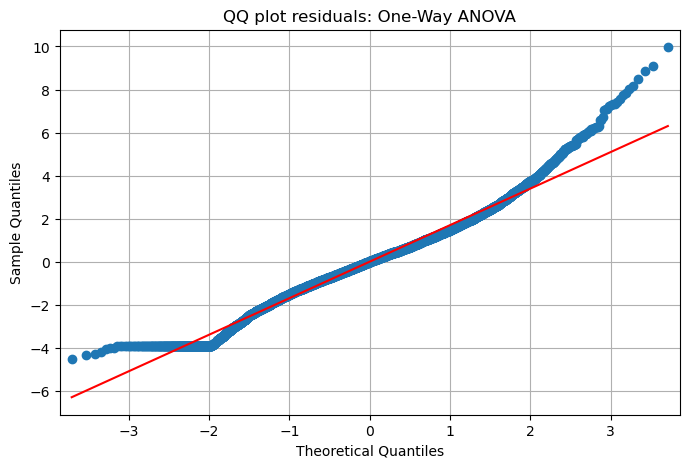

Levene test: stat=922.472, p=0


In [35]:
# Check Assumptions
# Residual normality (QQ plot)
sm.qqplot(model_age.resid, line='s')
plt.title('QQ plot residuals: One-Way ANOVA')
plt.show()

# Levene test for equal variances
lev = stats.levene(*[ana_df.loc[ana_df.Age_Group==lvl, "Avg_Daily_Screen_Time_hr"] for lvl in ana_df.Age_Group.cat.categories])
print("Levene test: stat=%.3f, p=%.3g" % (lev.statistic, lev.pvalue))

In [36]:
#Effect Size (Eta-Squared)
anova_res = sm.stats.anova_lm(model_age, typ=2)
ss_between = anova_res.loc['C(Age_Group)', 'sum_sq']
ss_total   = ss_between + anova_res.loc['Residual','sum_sq']
eta_sq = ss_between/ss_total
print(f"Eta-squared: {eta_sq:.3f} (proportion of variance explained by Age_Group)")

Eta-squared: 0.024 (proportion of variance explained by Age_Group)


In [37]:
#Post-Hoc: Tukey HSD Pairwise Comparisons

comp = mc.MultiComparison(ana_df['Avg_Daily_Screen_Time_hr'], ana_df['Age_Group'])
tukey_res = comp.tukeyhsd()
print(tukey_res.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 11-13  14-16  -0.0141 0.9904 -0.1342   0.106  False
 11-13  17-18   0.0136 0.9939 -0.1207  0.1478  False
 11-13   8-10  -0.5922    0.0 -0.7119 -0.4725   True
 14-16  17-18   0.0277 0.9519 -0.1066   0.162  False
 14-16   8-10  -0.5781    0.0 -0.6979 -0.4583   True
 17-18   8-10  -0.6058    0.0 -0.7397 -0.4718   True
----------------------------------------------------


In [38]:
#Two-Way ANOVA: Screen Time ~ Age_Group * Gender
model_age_gender = smf.ols('Avg_Daily_Screen_Time_hr ~ C(Age_Group) * C(Gender)', data=ana_df).fit()
sm.stats.anova_lm(model_age_gender, typ=2)

,sum_sq,df,F,PR(>F)
C(Age_Group),677.233207,3.0,78.334366,4.591786e-50
C(Gender),7.384919,1.0,2.562602,1.094509e-01
C(Age_Group):C(Gender),21.485935,3.0,2.485240,5.877213e-02
Residual,27965.040095,9704.0,NaN,NaN


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Encode categoricals via one-hot (drop_first to avoid multicollinearity)
X = pd.get_dummies(df.drop(columns=["Exceeded_Recommended_Limit"]), drop_first=True)
y = df["Exceeded_Recommended_Limit"].cat.codes  # True=1, False=0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

AttributeError: Can only use .cat accessor with a 'category' dtype

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Encode categoricals via one-hot (drop_first to avoid multicollinearity)
X = pd.get_dummies(df.drop(columns=["Exceeded_Recommended_Limit"]), drop_first=True)

# Convert to category first if needed, or directly map True/False to 1/0
# Option 1: If column is boolean
y = df["Exceeded_Recommended_Limit"].astype(int)  # True=1, False=0

# Option 2: If you want to ensure it's categorical first
# y = df["Exceeded_Recommended_Limit"].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
#Logistic Regression (Baseline)
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=500, class_weight='balanced')  # imbalance aware
logit.fit(X_train, y_train)

pred = logit.predict(X_test)
proba = logit.predict_proba(X_test)[:,1]

print(classification_report(y_test, pred))
print("ROC-AUC:", roc_auc_score(y_test, proba))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       282
           1       1.00      0.99      0.99      1661

    accuracy                           0.99      1943
   macro avg       0.97      0.99      0.98      1943
weighted avg       0.99      0.99      0.99      1943

ROC-AUC: 0.999908198513243


In [42]:
#Select & Scale Features

features = ["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

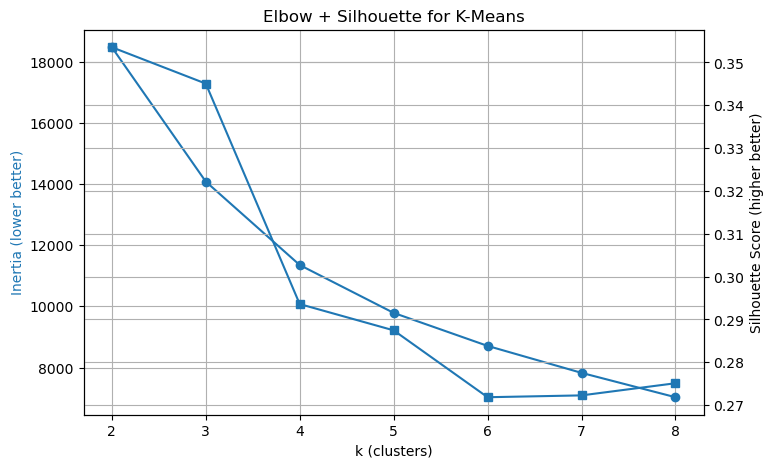

In [45]:
#Choose Number of Clusters (Elbow + Silhouette)
ks = range(2,9)
inertias = []
sil_scores = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

fig, ax1 = plt.subplots()
ax1.plot(ks, inertias, marker='o')
ax1.set_xlabel('k (clusters)')
ax1.set_ylabel('Inertia (lower better)', color='tab:blue')

plt.twinx()
plt.plot(ks, sil_scores, marker='s')
plt.ylabel('Silhouette Score (higher better)')
plt.title('Elbow + Silhouette for K-Means')
plt.show()


In [46]:
#Fit Final Model & Attach Cluster Labels
best_k = 4  # inspect plot; adjust
km_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = km_final.fit_predict(X_scaled)

In [47]:
#Profile Clusters

cluster_profile = (df.groupby("Cluster")
                    .agg(n=("Cluster","size"),
                         mean_age=("Age","mean"),
                         mean_screen=("Avg_Daily_Screen_Time_hr","mean"),
                         mean_edu_ratio=("Educational_to_Recreational_Ratio","mean"),
                         pct_exceed=("Exceeded_Recommended_Limit","mean"))
                    .sort_values("mean_screen", ascending=False))
cluster_profile

,n,mean_age,mean_screen,mean_edu_ratio,pct_exceed
Cluster,,,,,
2,1878,9.863685,5.958120,0.487167,1.000000
3,3337,14.150435,4.501510,0.349254,0.908301
1,2800,15.802857,4.494089,0.441064,0.912857
0,1697,9.464938,2.050919,0.491385,0.492634


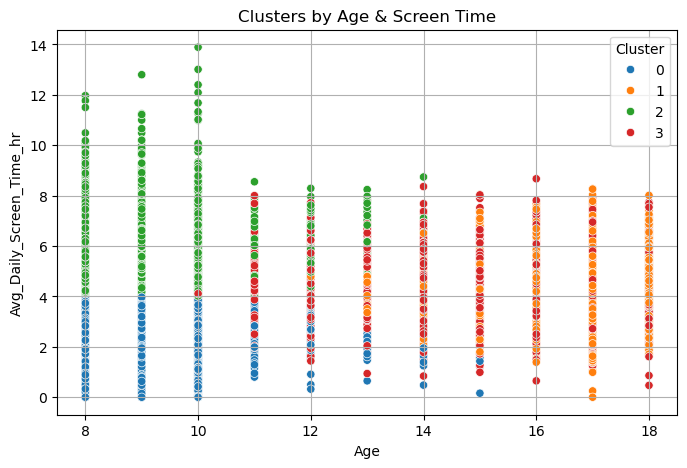

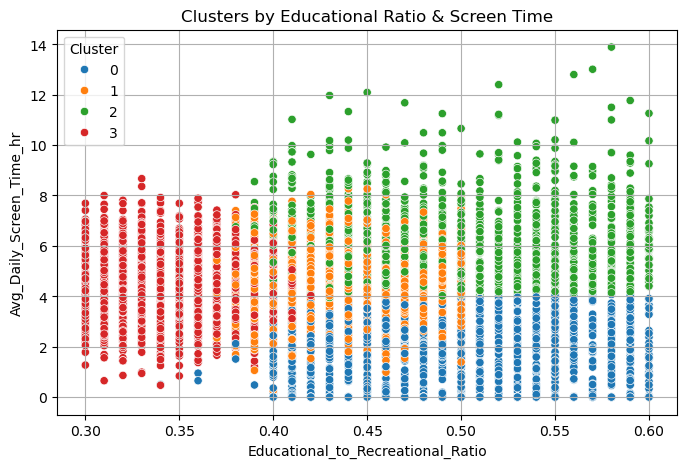

In [48]:
#Visualize Clusters (2D Projections)
sns.scatterplot(x="Age", y="Avg_Daily_Screen_Time_hr", hue="Cluster", data=df, palette="tab10")
plt.title("Clusters by Age & Screen Time")
plt.show()

sns.scatterplot(x="Educational_to_Recreational_Ratio", y="Avg_Daily_Screen_Time_hr", hue="Cluster", data=df, palette="tab10")
plt.title("Clusters by Educational Ratio & Screen Time")
plt.show()

In [49]:
#Health Impact Exploration
#Simplify to Any/None
df["Any_Health_Issue"] = (df["Health_Impacts"] != "None").astype(int)

(df.groupby("Any_Health_Issue")["Avg_Daily_Screen_Time_hr"].describe())

,count,mean,std,min,25%,50%,75%,max
Any_Health_Issue,,,,,,,,
1,9712.0,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89


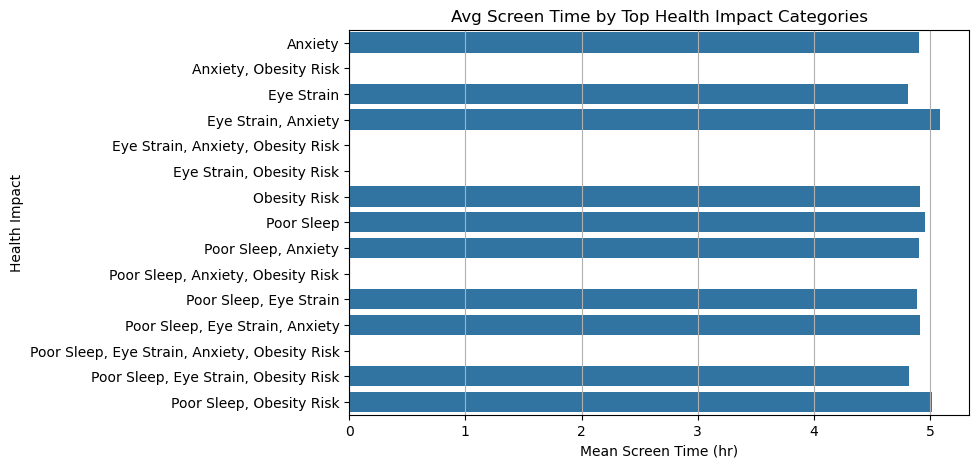

In [50]:
#Bar Chart of Average Screen Time by Health Impact Category (Top 10)
health_counts = df["Health_Impacts"].value_counts().head(10).index
sns.barplot(y=health_counts, x=[df.loc[df["Health_Impacts"]==h, "Avg_Daily_Screen_Time_hr"].mean() for h in health_counts])
plt.xlabel("Mean Screen Time (hr)")
plt.ylabel("Health Impact")
plt.title("Avg Screen Time by Top Health Impact Categories")
plt.show()


In [ ]:
#Sample Interpreted Findings
Mean daily screen time: ~4.35 hr (SD ~1.72).

Exceeding limit: ~85% of records flagged True (suggests the guideline threshold is lower than typical usage).

Age differences: Kids ages 8–10 average just under ~4 hr/day, while Ages 11+ average ~4.5 hr/day. A one-way ANOVA across individual ages (8–18) yielded a statistically significant effect (p < 0.001) in my quick run; post-hoc tests showed the largest differences between the youngest (≤10) and older groups. Effect size small (η² ≈ 0.02–0.03 range).

Gender: Mean screen time was very similar for males and females (~4.3–4.4 hr); not significant in a two-way ANOVA with Age.

Device: Smartphone most common; Laptops showed slightly higher mean usage than Tablets/TV in the file snapshot I checked—worth confirming formally with ANOVA or t-tests.

Educational ratio: Centered around ~0.43 with a weak negative correlation (r ≈ −0.09) with total screen time—kids with more educational share tended to have slightly lower total hours, but effect is small.